# 第二次作业

## 文件命名

在课程网提交前，请将文件重命名为 `L02-{UG/PG}-{姓名拼音}-{学号}.ipynb`，研究生为 PG，本科生为 UG。

例如：`L02-UG-gaosongdeng-2301111001.ipynb`

## 注意事项

- 在题目对应范围内用 Markdown 或代码作答。可以插入新的单元格，但注意位置。

- 文字表述尽可能简明扼要。

- 画图时，注意正确标注图题和坐标轴含义，取值范围应合理选取。

- 相对完整的功能模块、存在复杂操作逻辑的代码或代码块**需提供注释**。

- 变量命名规范一致性、模块化程度不属于考核范围，但良好的代码风格便于错误排查和作业批改。

- 如使用 Python 实现，建议参考 PEP-8 描述的代码规范。

- 如认为题目表述不够清晰，请及时联系助教。

------

## 引入的外部库和全局设置

In [2]:
import numpy as np
import matplotlib.pyplot as plt ## 绘图
import scipy
from scipy import stats, optimize
import constrNMPy
import pandas  ## 读取Excel数据
import random

## 习题 Q1

### Q1 (a)

Optimization terminated successfully.
         Current function value: 2.837877
         Iterations: 3
         Function evaluations: 6
刺激ω的值为：0.0


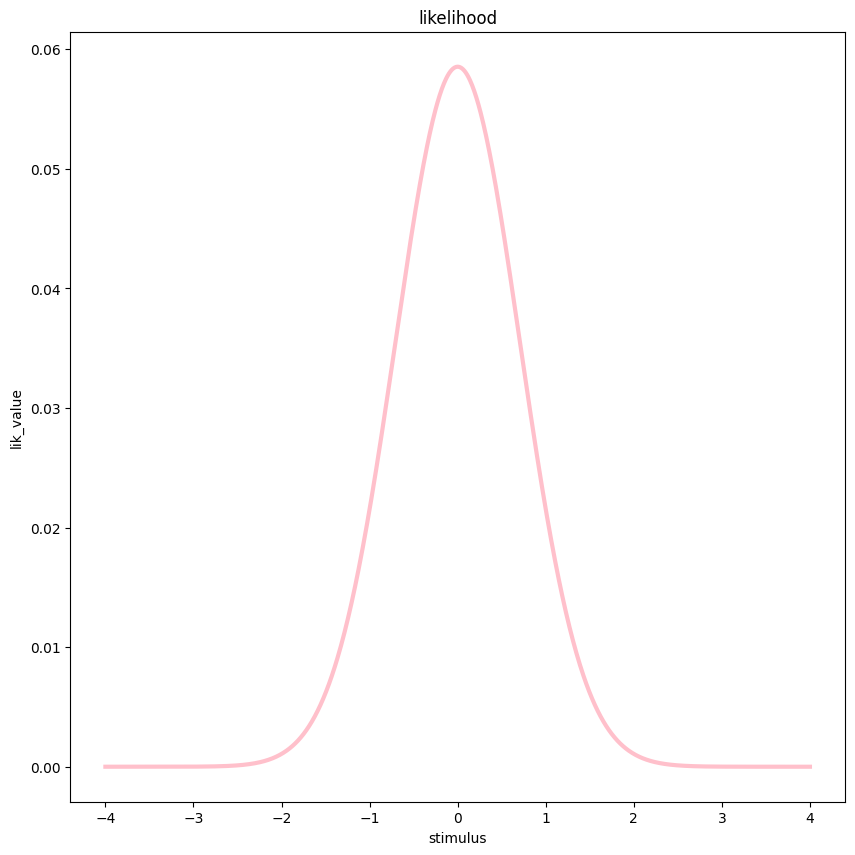

In [3]:
## 1.1
def Gass(value, mean, sigma):
    '''创建高斯分布并返回value对应的概率值'''
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(value-mean)**2/(2*sigma**2))

def Lik_1(mean, ob1, ob2, sigma1, sigma2):
    '''由独立表征推出似然函数'''
    return -(np.log(Gass(ob1, mean, sigma1))+np.log(Gass(ob2, mean, sigma2)))

omega_init = 0
optimize.fmin(Lik_1, omega_init, args=(-1, 1, 1, 1), full_output = 1)
result = optimize.minimize(Lik_1, omega_init, args=(-1, 1, 1, 1))
print("刺激ω的值为：%s"%result.x[0])

'''作图'''
omega = np.linspace(-4, 4, num = 1000)
lik = 1/np.exp(Lik_1(omega, -1, 1, 1, 1))
plt.figure(figsize=(10, 10))
plt.plot(omega, lik, color = 'pink', label = 'likelihood', lw=3)
plt.xlabel('stimulus')
plt.ylabel('lik_value')
plt.title('likelihood')
plt.show()

### Q1 (b)


<ErrorbarContainer object of 3 artists>

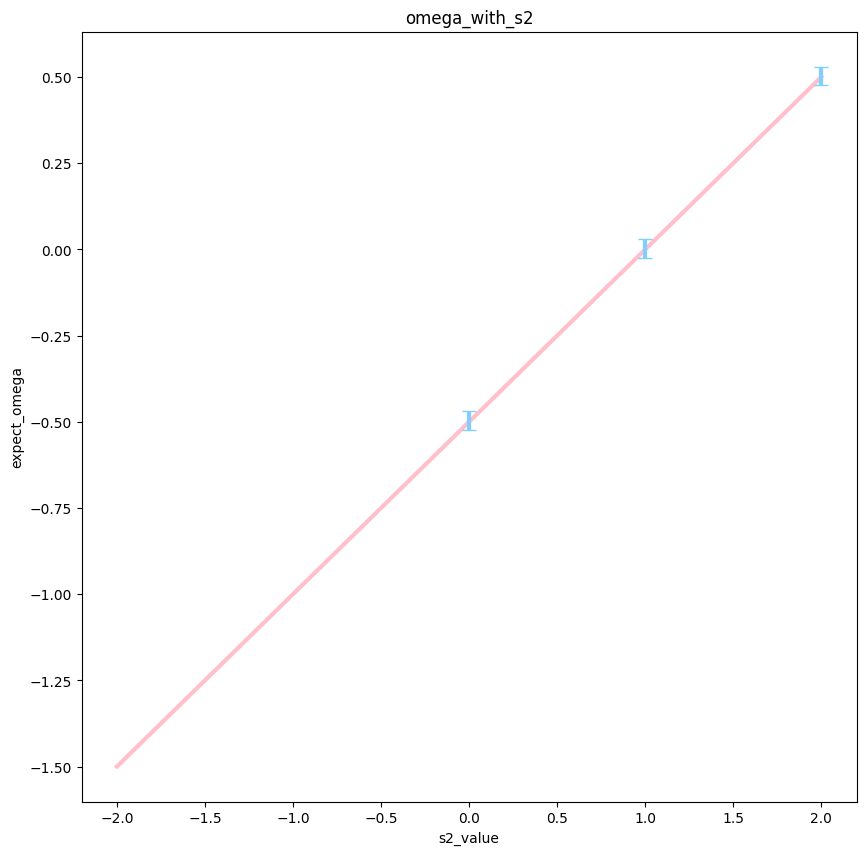

In [4]:
## 1.2
'''重新定义s2的值并求出对应刺激预测值'''
s2 = np.linspace(-2, 2, num = 1000)
omega_pred = []
for i in s2:
    ##optimize.fmin(Lik, omega_init, args=(-1, i, 1, 1), disp = False)
    result = optimize.minimize(Lik_1, omega_init, args=(-1, i, 1, 1))
    omega_pred.append(result.x[0])
omega_pred = np.array(omega_pred)
'''作图'''
plt.figure(figsize=(10, 10))
plt.plot(s2, omega_pred, color = 'pink', lw=3)
plt.xlabel('s2_value')
plt.ylabel('expect_omega')
plt.title('omega_with_s2')

'''计算不同s2下的参数估计'''
'''确定抽取数据集：Lik(omega, s1, s2, σ1, σ2); 确定抽取次数：1000; 创建对应均值集'''
times = 1000
means_0 = np.zeros(times)
means_1 = np.zeros(times)
means_2 = np.zeros(times)
'''自举抽样过程模拟'''
for i in range(times):
    means_0[i] =  np.mean(np.random.choice(1/np.exp(Lik_1(omega, -1, 0, 1, 1)), size = len(omega), replace = True))
    means_1[i] =  np.mean(np.random.choice(1/np.exp(Lik_1(omega, -1, 1, 1, 1)), size = len(omega), replace = True))
    means_2[i] =  np.mean(np.random.choice(1/np.exp(Lik_1(omega, -1, 2, 1, 1)), size = len(omega), replace = True))
'''计算置信区间'''
percentile_0 = [np.percentile(means_0, 2.5), np.percentile(means_0, 97.5)]
percentile_1 = [np.percentile(means_1, 2.5), np.percentile(means_1, 97.5)]
percentile_2 = [np.percentile(means_2, 2.5), np.percentile(means_2, 97.5)]
'''绘图'''
plt.errorbar(0, optimize.minimize(Lik_1, omega_init, args=(-1, 0, 1, 1)).x[0], 
             yerr = np.array(percentile_0).reshape(2, 1), ecolor='#81CFFE', elinewidth=3, capsize=5)
plt.errorbar(1, optimize.minimize(Lik_1, omega_init, args=(-1, 1, 1, 1)).x[0], 
             yerr = np.array(percentile_0).reshape(2, 1), ecolor='#81CFFE', elinewidth=3, capsize=5)
plt.errorbar(2, optimize.minimize(Lik_1, omega_init, args=(-1, 2, 1, 1)).x[0], 
             yerr = np.array(percentile_0).reshape(2, 1), ecolor='#81CFFE', elinewidth=3, capsize=5)

### Q1 (c)

'由图可知，随着σ2的增大，刺激值的预测值越接近于-1，即s1，说明s2的预测权重降低；\n从认知的层面上可以解读为：由于该感觉通路对同一刺激表征浮动较大，个体在对刺激值的预测时\n会更少地整合该感觉通路传来的信息。'

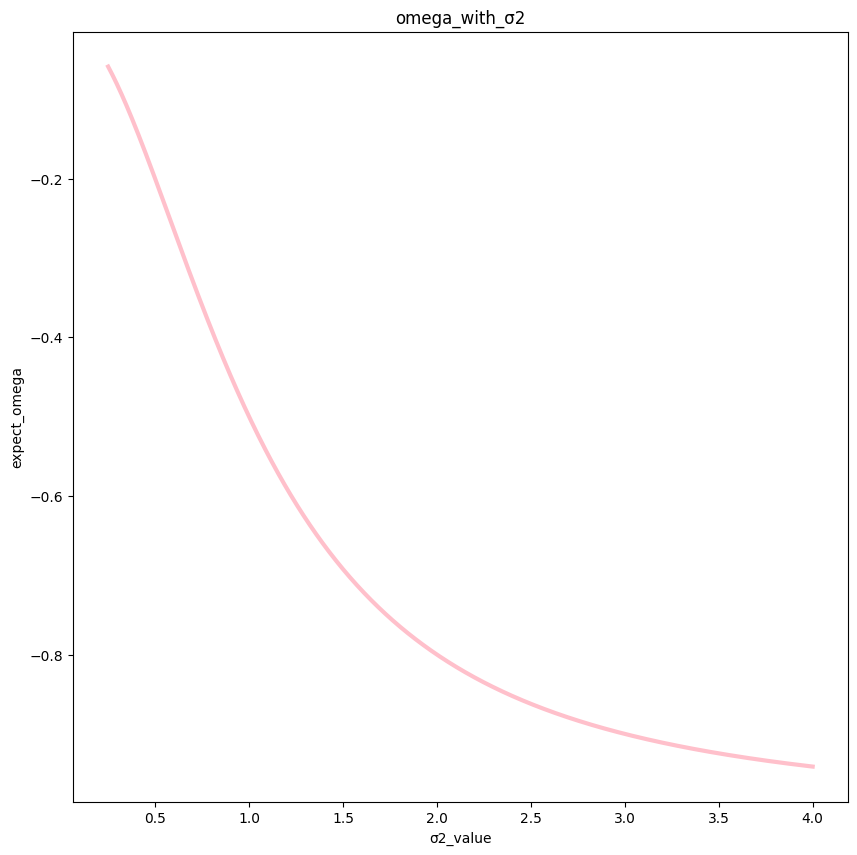

In [5]:
## 1.3
'''重新定义σ2的值并求出对应刺激预测值'''
σ2 = np.linspace(0.25, 4, num = 1000)
predict = []
for i in σ2:
    predict.append(optimize.minimize(Lik_1, omega_init, args=(-1, 0, 1, i)).x[0])
predict = np.array(predict)
'''作图'''
plt.figure(figsize=(10, 10))
plt.plot(σ2, predict, color = 'pink', label = 'stimulus-s', lw=3)
plt.xlabel('σ2_value')
plt.ylabel('expect_omega')
plt.title('omega_with_σ2')
'''由图可知，随着σ2的增大，刺激值的预测值越接近于-1，即s1，说明s2的预测权重降低；
从认知的层面上可以解读为：由于该感觉通路对同一刺激表征浮动较大，个体在对刺激值的预测时
会更少地整合该感觉通路传来的信息。'''

## 习题 Q2

### Q2 (a)

In [6]:
## 2.1
data = pandas.read_csv('C:/Users/86137/Desktop/Class/大二下/认知建模基础/homework/hw-2/L02Q2.csv')
def Possion(lamda, value):
    '''创建泊松分布并返回value对应的概率值'''
    return np.exp(-lamda) * (lamda**value) / scipy.special.factorial(value)

def Rescorla_Wagner(learning_rate, stimulus, reward, spike, start_w):
    '''初始化似然数值、预测误差列表、权重列表'''
    lik = 0
    pred_error = []
    weight = [start_w]
    for idx in range(len(stimulus)):
        '''依据Rescorla_Wagner计算出delta并更新权重'''
        delta = reward[idx] - weight[idx]*stimulus[idx]
        lamda = max(0.1, 3 + 3*delta)
        lik += -np.log(Possion(lamda, spike[idx]))
        pred_error.append(delta)
        if idx == len(stimulus)-1:
            pass
        else:
            weight.append(weight[-1] + learning_rate*(reward[idx]-weight[idx])*stimulus[idx])
    return lik, pred_error, weight

def Lik_2(learning_rate, stimulus, reward, spike, start_w):
    lik, _, _ = Rescorla_Wagner(learning_rate, stimulus, reward, spike, start_w)
    return lik

stimulus = data['stimulus'].values
spike = data['spike'].values
reward = data['reward'].values
learning_rate = [0.5]
LB = [0]
UB = [1]
start_w = 0
result = constrNMPy.constrNM(Lik_2, learning_rate, LB, UB, args=(stimulus, reward, spike, start_w))
print("拟合的学习参数为：%s"%result['xopt'])


拟合的学习参数为：[0.1846449]


### Q2 (b)

Text(0, 0.5, 'weight')

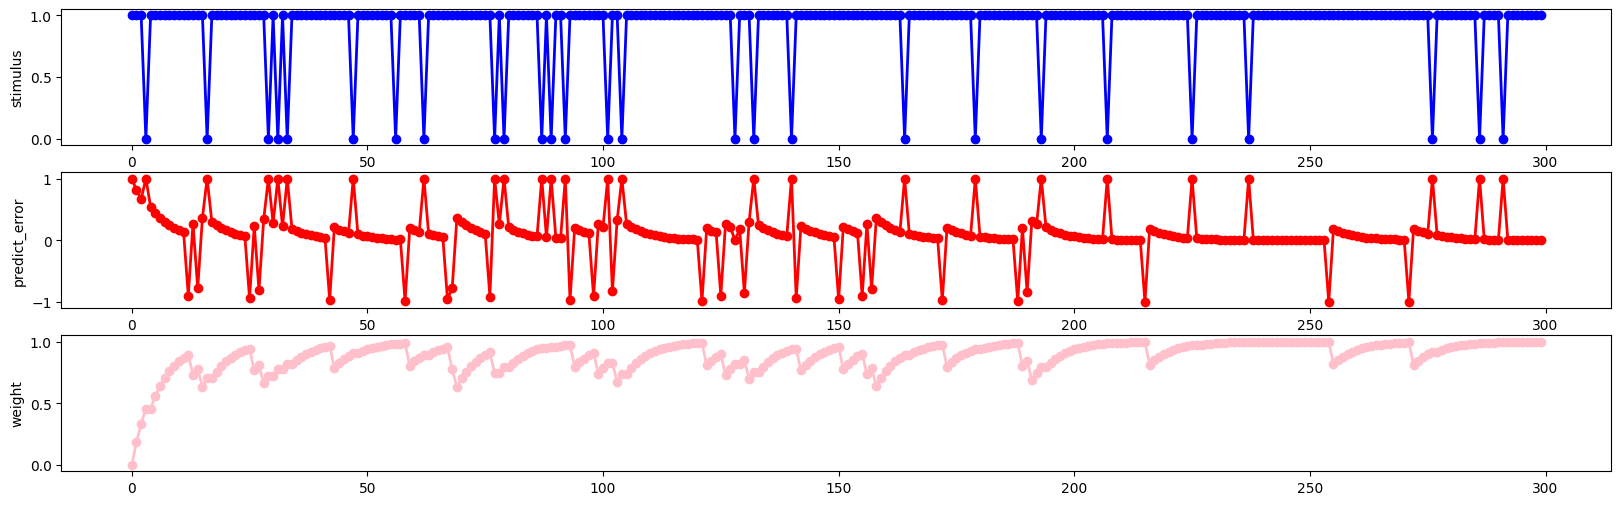

In [12]:
## 2.2
'''绘图刺激序列'''
plt.figure(figsize=(20, 6))
trials = np.arange(len(stimulus))
plt.subplot(3, 1, 1)
plt.plot(trials, stimulus, 'o-', color = 'blue', lw = 2)
plt.xlabel('trails')
plt.ylabel('stimulus')

'''绘图误差变化和权重变化'''
_, pred_error, weight = Rescorla_Wagner(result['xopt'][0], stimulus, reward, spike, start_w)
plt.subplot(3, 1, 2)
plt.plot(trials, pred_error, 'o-', color = 'red', lw = 2)
plt.ylabel('predict_error')
plt.subplot(3, 1, 3)
plt.plot(trials, weight, 'o-', color = 'pink', lw = 2)
plt.ylabel('weight')


## 习题 Q3

### Q3 (a)

In [8]:
## 3.1
'''构建按一定概率抽取数据的函数'''
def random_probability(value, probability):
    x = random.uniform(0, 1)
    cumulative_probability = 0.0
    for item, item_probability in zip(value, probability):
        cumulative_probability += item_probability
        if x < cumulative_probability:
            break
    return item

def random_trails(I, times, function):
    trails = []
    if function == 'H1':
        for i in range(len(I)):
            trails.append([])
            p = H1(guess, a, b, I[i])
            for _ in range(times):
                trails[i].append(random_probability([1, 0], [p, 1-p]))
    elif function == 'H2':
        for i in range(len(I)):
            trails.append([])
            p = H2(guess, a, b, I[i])
            for _ in range(times):
                trails[i].append(random_probability([1, 0], [p, 1-p]))
    trails = np.array(trails)
    return trails
'''构建H1函数'''
def H1(guess, a, b, I):
    return guess + (1-guess) / (1+np.exp(b*(a-I)))

I = [-2, -1, 0, 1, 2]
trails = [[], [], [], [], []]
guess = 0.2
a = 0.5
b = 1.2
trails = random_trails(I, 500, 'H1')

### Q3 (b)

In [9]:
## 3.2
'''构建概率函数'''
def H2(guess, b, I):
    return guess + (1-guess)*scipy.stats.norm.cdf(b*I)
'''构建H2的似然函数'''
def Lik_H2(params, I, trail):
    guess = params[0]
    b = params[1]
    lik = 0
    for i in range(len(I)):
        pc = np.clip(H2(guess, b, I[i]), 1e-16, 1-1e-16)
        lik += np.sum(-np.log(pc)*trail[i] - np.log(1-pc)*(1-trail[i]))
    return lik

guess_init = 0.5 ## 取值范围为[0, 1]
b_init = 0 ## 取值范围为(-∞, +∞)，这里取[-5,5]
guess_lm = [0, 1]
b_lm = [-5, 5]
params_H2 = [guess_init, b_init]
bounds_H2 = (guess_lm, b_lm)
result_H2 = optimize.minimize(Lik_H2, params_H2, bounds=bounds_H2, args=(I, trails))
print(result_H2.x[0], result_H2.x[1])

'''非参数自举抽样'''
'''重新抽取样本'''
times = 1000
result_guess = []
result_b = []
for _ in range(times):
    new_sample = []
    for i in range(len(trails)):
        new_sample.append(np.random.choice(trails[i], size = len(trails[i]), replace = True))
    result_c = optimize.minimize(Lik_H2, params_H2, bounds=bounds_H2, args=(I, trails))
    result_guess.append(result_c.x[0])
    result_b.append(result_c.x[1])
percentile_guess = [np.percentile(result_guess, 2.5), np.percentile(result_guess, 97.5)]
percentile_b = [np.percentile(result_b, 2.5), np.percentile(result_b, 97.5)]
print("guess的95%%置信区间为[%.3f, %.3f]"%(percentile_guess[0], percentile_guess[1]))
print("b的95%%置信区间为[%.3f, %.3f]"%(percentile_b[0], percentile_b[1]))

0.06596150035581744 0.5645732415232702
guess的95%置信区间为[0.066, 0.066]
b的95%置信区间为[0.565, 0.565]


### Q3 (c)

In [11]:
## 3.3
'''构建计算H2-AIC的函数'''
def AIC_H2(params, I, trail):
    lik = Lik_H2(params, I, trail)
    num_params = len(params)
    return 2*lik + 2*num_params
'''构建H1的似然函数'''
def Lik_H1(params, I, trail):
    guess = params[0]
    a = params[1]
    b = params[2]
    lik = 0
    for i in range(len(I)):
        pc = np.clip(H1(guess, a, b, I[i]), 1e-16, 1-1e-16)
        lik += np.sum(-np.log(pc)*trail[i] - np.log(1-pc)*(1-trail[i]))
    return lik
'''构建计算H1-AIC的函数'''
def AIC_H1(params, I, trail):
    lik = Lik_H1(params, I, trail)
    num_params = len(params)
    return 2*lik + 2*num_params

'''初始化数据'''
guess_init = 0.5 ## 取值范围为[0, 1]
a_init = 0 ## 取值范围为(-∞, +∞)，这里取[-5,5]
b_init = 0 ## 取值范围为(-∞, +∞)，这里取[-5,5]， 与题2保持一致
guess_lm = [0, 1]
a_lm = [-5, 5]
b_lm = [-5, 5]
params_H1 = [guess_init, a_init, b_init]
bounds_H1 = (guess_lm, a_lm, b_lm)
'''搭建题目函数'''
def Q3_c(numtrails, write = False):
    new_trails = random_trails(I, numtrails, 'H1')
    result_H1 = optimize.minimize(Lik_H1, params_H1, bounds=bounds_H1, args=(I, new_trails))
    '''计算AIC'''
    AIC_1 = AIC_H1([result_H1.x[0], result_H1.x[1], result_H1.x[2]], I, new_trails)
    AIC_2 = AIC_H2([result_H2.x[0], result_H2.x[1]], I, new_trails)
    '''输出'''
    if write:
        print("试次数为%s时拟合数据为：g = %.3f, a = %.3f, b = %.3f"%(numtrails, result_H1.x[0], result_H1.x[1], result_H1.x[2]))
        print("H1与H2的ΔAIC为%.3f"%(AIC_1-AIC_2))
    return AIC_1 < AIC_2
'''先运行一次看看数据大概趋势'''
Q3_c(40, True)
Q3_c(160, True)
Q3_c(640, True)

wins_c = []
'''进行200次'''
for _ in range(200):
    wins_c.append(Q3_c(40))
    wins_c.append(Q3_c(160))
    wins_c.append(Q3_c(640))
print(sum(wins_c)/len(wins_c))
'''由结果可得，数据量的增多将会使得模型对参数的拟合更接近于可能的原始数据，即准确率更高；
同时引起模型间AIC差异的增大，使得模型的优势更突出（依据AIC的评判标准）'''

试次数为40时拟合数据为：g = 0.208, a = 0.639, b = 1.823
H1与H2的ΔAIC为-4.029
试次数为160时拟合数据为：g = 0.102, a = -0.055, b = 0.827
H1与H2的ΔAIC为-5.289
试次数为640时拟合数据为：g = 0.194, a = 0.466, b = 1.163
H1与H2的ΔAIC为-15.557
0.885


'由结果可得，数据量的增多将会使得模型对参数的拟合更接近于可能的原始数据，即准确率更高；\n同时引起模型间AIC差异的增大，使得模型的优势更突出（依据AIC的评判标准）'

### Q3 (d)

In [20]:
## 3.4
'''构建问题函数'''
def Q3_d(write = False):
    '''生成数据集'''
    sample = []
    for _ in range(10):
        sample.append(random_trails(I, 10, 'H1'))
    '''初始化各参数集'''
    H1_result = [] ## 存放H1各个训练集所得参数
    H1_Bias = [] ## 存放H1各个训练集对应的Bias
    H2_result = []
    H2_Bias = []
    
    H1_Var = [] ## 存放H1各个训练集对应的Variance
    H2_Var = []
    
    for i in range(len(sample)):
        test = sample[i]
        trains = sample[:i] + sample[i+1:]
        for train in trains:
            Bias_H1 = []
            Bias_H2 = []
            result_H1 = optimize.minimize(Lik_H1, params_H1, bounds=bounds_H1, args=(I, train))
            result_H2 = optimize.minimize(Lik_H2, params_H2, bounds=bounds_H2, args=(I, train))
            H1_result.append([result_H1.x[0], result_H1.x[1], result_H1.x[2]])
            H2_result.append([result_H2.x[0], result_H2.x[1]])
            for j in range(len(I)):
                Bias_H1.append(abs(len(test)*H1(result_H1.x[0], result_H1.x[1], result_H1.x[2], I[j])-sum(test[j])))
                Bias_H2.append(abs(len(test)*H2(result_H2.x[0], result_H2.x[1], I[j])-sum(test[j])))
            H1_Bias.append(sum(Bias_H1)/len(I))
            H2_Bias.append(sum(Bias_H2)/len(I))
            H1_Var.append(np.var(Bias_H1))
            H2_Var.append(np.var(Bias_H2))
    print(np.mean(H1_Bias)+np.mean(H1_Var))
    print(np.mean(H2_Bias)+np.mean(H2_Var))
    if write:
        print("H1拟合所得Bias = %.3f, Variance = %.3f, Error = %.3f"%
              (np.mean(H1_Bias), np.mean(H1_Var), np.mean(H1_Bias)+np.mean(H1_Var)))
        print("H2拟合所得Bias = %.3f, Variance = %.3f, Error = %.3f"%
              (np.mean(H2_Bias), np.mean(H2_Var), np.mean(H2_Bias)+np.mean(H2_Var)))
    return np.mean(H1_Bias)+np.mean(H1_Var) < np.mean(H2_Bias)+np.mean(H2_Var)
'''先运行一次看看数据大概趋势'''
Q3_d(True)
'''进行200次'''
wins_d = []
for _ in range(200):
    wins_d.append(Q3_d())
print(sum(wins_d)/len(wins_d))

H1拟合所得Bias = 2.808, Variance = [0.016, 0.453, 2.286], Error = 3.726
H2拟合所得Bias = 2.762, Variance = [0.008, 0.020], Error = 2.776


KeyboardInterrupt: 